In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('/home/nashtech/Documents/dataset2.csv', sep='\t')

In [14]:
# Structure
numRows = data.shape[0]
numCols = data.shape[1]
print(f"Dataset has {numRows} rows and {numCols} columns")

Dataset has 891 rows and 12 columns


In [16]:
# Content
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
# Content info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# Columns having missing or null values
nullCols = data.isnull().sum()
print(nullCols[nullCols > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [26]:
# Drop 'Cabin' column (too many missing values)
data.drop(columns=['Cabin'], inplace=True)

In [32]:
# Fill missing 'Embarked' with mode (most common value)
data['Embarked'] = data['Embarked'].astype(str)
data.fillna(data['Embarked'].mode()[0], inplace=True)

In [34]:
# Fill missing 'Age' with median
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert bad strings to NaN
data.fillna(data['Age'].median(), inplace=True)

In [35]:
# Drop any remaining rows with missing values
data.dropna(inplace=True)

# Reset index
data.reset_index(drop=True, inplace=True)

# Confirm no missing values
print("Missing values after cleaning:")
print(data.isnull().sum())

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


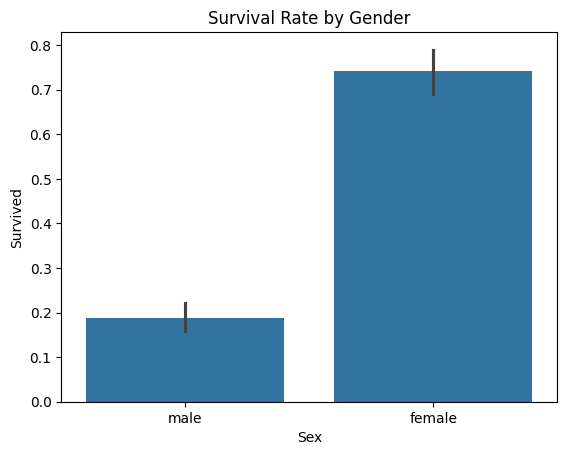

In [45]:
# Survival rate by gender
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print(survival_by_gender)
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


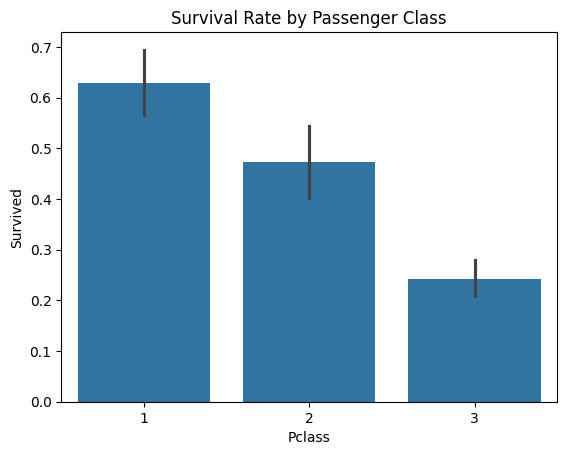

In [46]:
# Survival rate by passenger class
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print(survival_by_class)
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [51]:
# Survival rate by gender & passenger class
survival_by_gender_class = data.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print(survival_by_gender_class)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


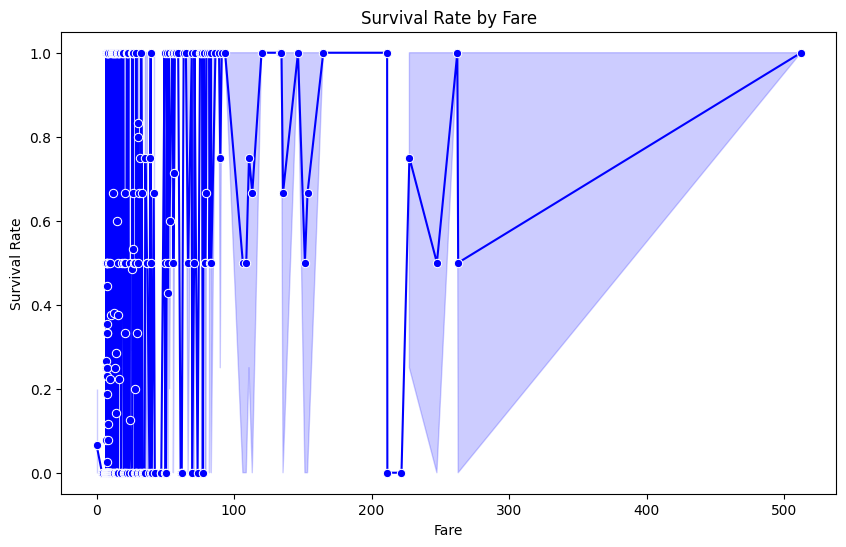

In [55]:
# Survival rate by fare
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fare', y='Survived', data=data, marker='o', color='b')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Survival Rate')
plt.show()

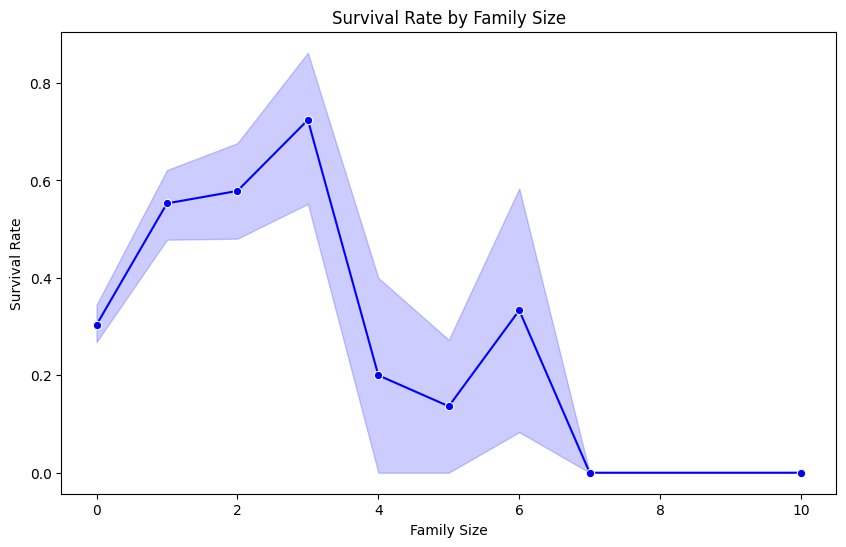

In [57]:
# Create family size column
data['FamilySize'] = data['SibSp'] + data['Parch']

# Survival rate by family size
plt.figure(figsize=(10, 6))
sns.lineplot(x='FamilySize', y='Survived', data=data, marker='o', color='b')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [58]:
'''
- Gender and Survival Rate: Females had a significantly higher survival rate compared to males. This suggests that women were more likely to survive the Titanic disaster, likely due to prioritization of women and children in lifeboats.

- Passenger Class and Survival Rate: First-class passengers had the highest survival rate, followed by second-class, with third-class passengers having the lowest survival rate. This indicates a strong relationship between class and survival, possibly due to better access to lifeboats and safer areas for first-class passengers.

- Family Size and Survival Rate: Passengers with smaller families (or traveling alone) seemed to have a slightly higher chance of survival. This could be because they might have been able to board lifeboats more quickly compared to those traveling with larger families, though this is a more subtle trend.

- Fare and Survival Rate: Higher fare was associated with higher survival rates. This is likely due to wealthier passengers being able to afford better accommodations, closer proximity to lifeboats, and quicker evacuation.

Key Insights:
- Class and gender were the most significant predictors of survival, with females and first-class passengers having much higher survival rates.

- Economic factors, reflected by fare and class, show a strong correlation with survival, indicating that wealthier passengers had better chances of survival.

'''

'\n- Gender and Survival Rate: Females had a significantly higher survival rate compared to males. This suggests that women were more likely to survive the Titanic disaster, likely due to prioritization of women and children in lifeboats.\n\n- Passenger Class and Survival Rate: First-class passengers had the highest survival rate, followed by second-class, with third-class passengers having the lowest survival rate. This indicates a strong relationship between class and survival, possibly due to better access to lifeboats and safer areas for first-class passengers.\n\n- Family Size and Survival Rate: Passengers with smaller families (or traveling alone) seemed to have a slightly higher chance of survival. This could be because they might have been able to board lifeboats more quickly compared to those traveling with larger families, though this is a more subtle trend.\n\n- Fare and Survival Rate: Higher fare was associated with higher survival rates. This is likely due to wealthier pas